In [1]:
import cv2
import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from scipy.misc import imread

%matplotlib inline

In [2]:
img_path = '../../data/raw/jpg/IMG_20170617_165023.jpg'

In [13]:
def toRGB(img):
    """Return RGB image"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def binarize_image(img):
    """Return a binary image given a RGB image using Otsu threholding algorithm."""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, bin_image = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return bin_image

def add_white_frame(img, size=10):
    """Change edge pixels to white."""
    white_framed = img.copy()
    white_framed[:size, :] = 1
    white_framed[-size:, :] = 1
    white_framed[:, :size] = 1
    white_framed[:, -size:] = 1
    return white_framed
    

def collapse_img_row_col(img, sigma=5):
    """Return mean row and column gaussian filtered"""
    mean_row = gaussian_filter1d(img.mean(axis=0), sigma)
    mean_col = gaussian_filter1d(img.mean(axis=1), sigma)
    return (mean_row, mean_col)

In [14]:
# script
img = cv2.imread(img_path)
bin_img = binarize_image(img)
bin_img_framed = add_white_frame(bin_img)
mean_row, mean_col = collapse_img_row_col(bin_img_framed)

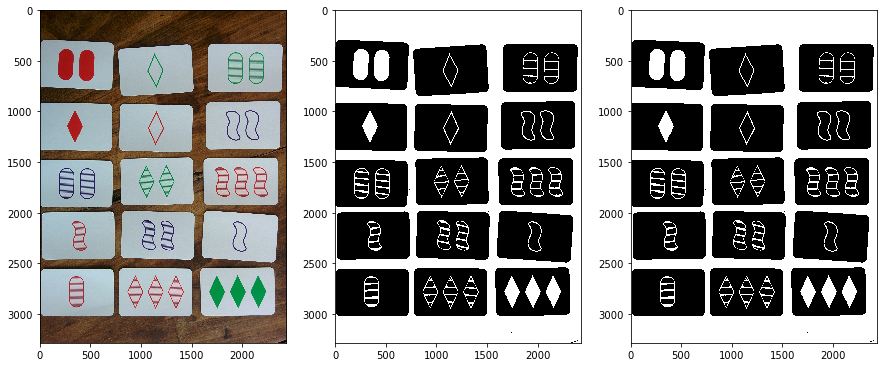

In [15]:
cards_colour = toRGB(img)
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(cards_colour);

plt.subplot(1, 3, 2)
plt.imshow(bin_img, cmap=plt.cm.gray);

plt.subplot(1, 3, 3)
plt.imshow(bin_img_framed, cmap=plt.cm.gray);

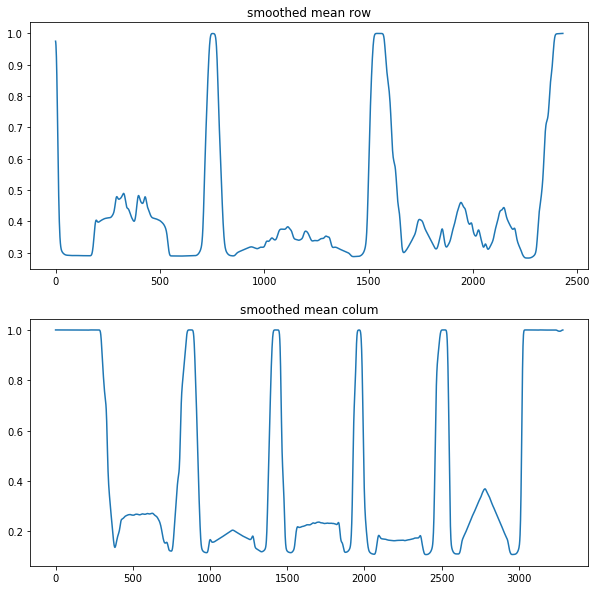

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('smoothed mean row')
plt.plot(mean_row);

plt.subplot(2, 1, 2)
plt.title('smoothed mean colum')
plt.plot(mean_col);

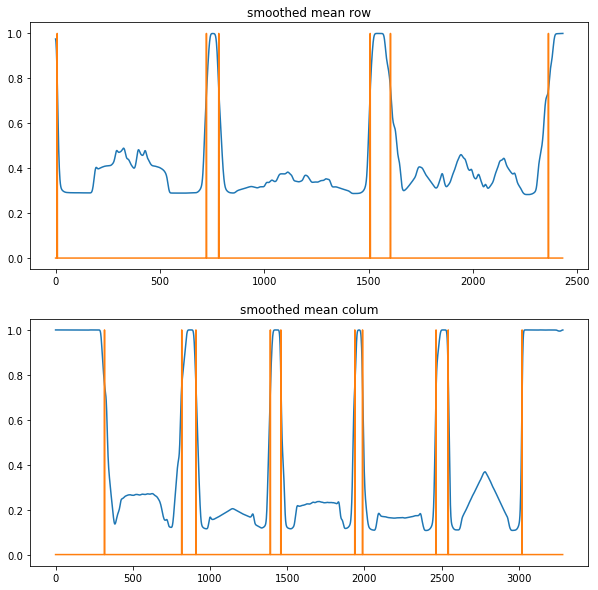

In [9]:
thres = 0.75

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('smoothed mean row')
plt.plot(mean_row);
mean_row_thres = mean_row > thres
plt.plot(np.logical_xor(mean_row_thres[1:], mean_row_thres[:-1]))

plt.subplot(2, 1, 2)
plt.title('smoothed mean colum')
plt.plot(mean_col);
mean_col_thres = mean_col > thres
plt.plot(np.logical_xor(mean_col_thres[1:], mean_col_thres[:-1]));

In [125]:
def cut_points(data, threshold):
    binary = data > threshold
    flips = np.argwhere(np.logical_xor(binary[1:], binary[:-1]))
    return flips.flatten()

In [126]:
xs_cuts = cut_points(mean_row, thres).reshape((-1, 2))
ys_cuts = cut_points(mean_col, thres).reshape((-1, 2))

In [127]:
xs_cuts

array([[   8,  723],
       [ 782, 1508],
       [1605, 2362]])

In [128]:
ys_cuts

array([[ 318,  817],
       [ 909, 1391],
       [1459, 1938],
       [1988, 2464],
       [2543, 3021]])

In [16]:
def crop(img, x1, x2, y1, y2):
    return img[y1:y2, x1:x2]

In [130]:
cards = []
for xcut in xs_cuts:
    for ycut in ys_cuts:
        cropped = crop(cards_colour, *(xcut.tolist() + ycut.tolist()))
        cards.append(cropped)
len(cards)

15

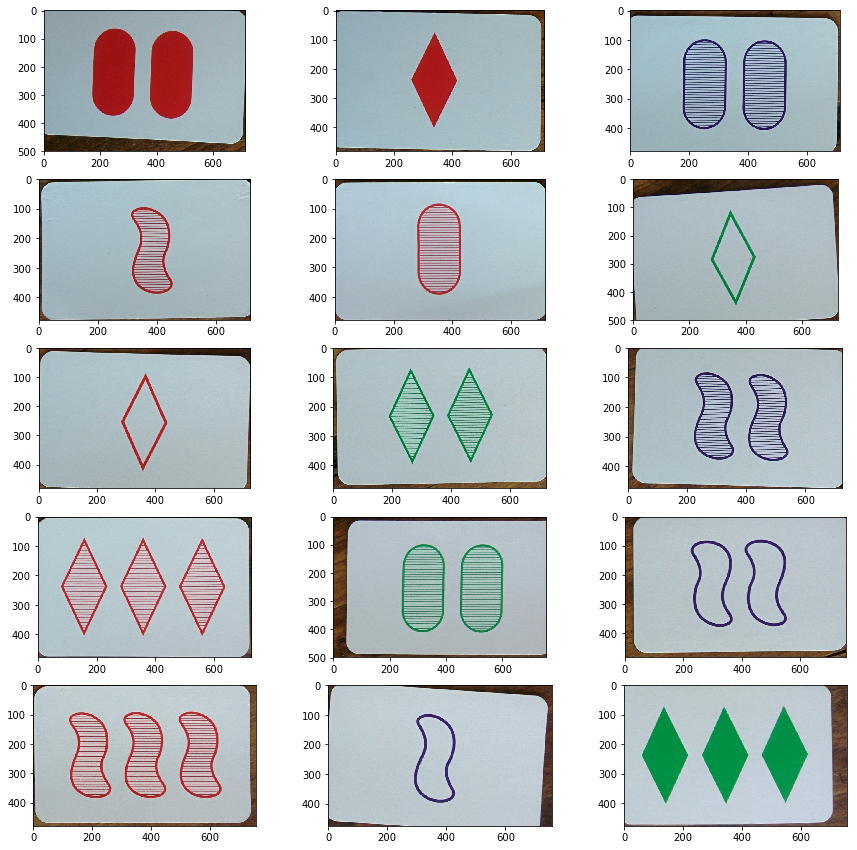

In [131]:
plt.figure(figsize=(15, 15))

nb_cards = len(cards)
nb_cols = 3
nb_rows = nb_cards // nb_cols
for i, card in enumerate(cards):
    plt.subplot(nb_rows, nb_cols, i + 1)
    plt.imshow(card);
